(20, 2)
(0.2005811042897239, 39.87342734644854)


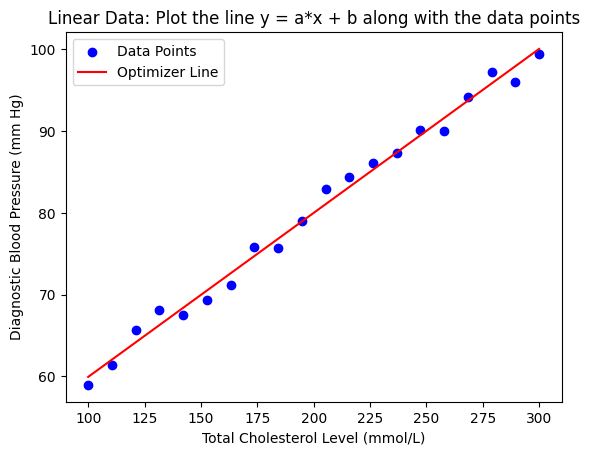

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import math

file_path = 'data_chol_dias_pressure.txt'
data = np.loadtxt(file_path)
data_shape = data.shape
print(data_shape)
x, y = data[:, 0], data[:, 1]

def compute(a, b, x, y):
    g = 0
    j = 0
    for i in x:
        g += (a * i + b - y[j]) ** 2
        j += 1
    return g

def appro_deriv_new(a, b, h, compute):
    df_da = (compute(a + h, b, x, y) - compute(a, b, x, y)) / h
    df_db = (compute(a, b + h, x, y) - compute(a, b, x, y)) / h
    return df_da, df_db

def gradient_descent_two_var(a_0, b_0, alpha, tol, h, compute, appro_deriv_new):
    a_k, b_k = a_0, b_0
    diff_a = float('inf')
    diff_b = float('inf')
    iter_count = 0
    iter_max = 100000
    while (diff_a >= tol or diff_b >= tol):
        a_k_new = a_k - alpha * (appro_deriv_new(a_k, b_k, h, compute)[0])
        b_k_new = b_k - alpha * (appro_deriv_new(a_k, b_k, h, compute)[1])
        diff_a = abs(a_k_new - a_k)
        diff_b = abs(b_k_new - b_k)
        a_k, b_k = a_k_new, b_k_new
        iter_count += 1
    return a_k, b_k

res = gradient_descent_two_var(2, 20, 0.000001, 0.000001, 0.0001, compute, appro_deriv_new)
print(res)

#Plotting the data points and the optimized line
a_optimized, b_optimized = res
y_optimized = [a_optimized * i + b_optimized for i in x]

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_optimized, color='red', label='Optimizer Line')
plt.xlabel('Total Cholesterol Level (mmol/L)')
plt.ylabel('Diagnostic Blood Pressure (mm Hg)')
plt.legend()
plt.title('Linear Data: Plot the line y = a*x + b along with the data points')
plt.show()

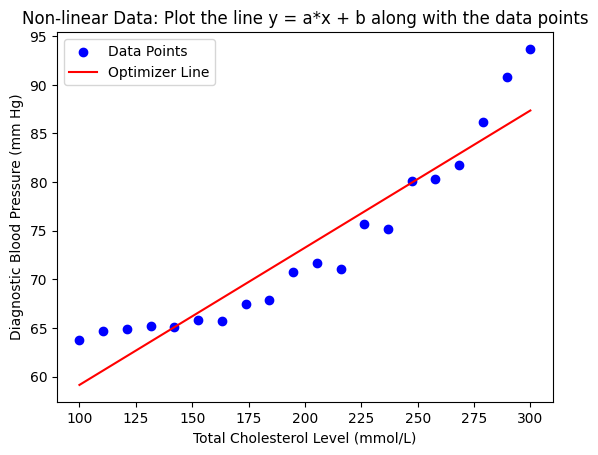

In [36]:
import numpy as np
import matplotlib.pyplot as plt

path2 = 'data_chol_dias_pressure_non_lin.txt'
data2 = np.loadtxt(path2)
x2, y2 = data2[:, 0], data2[:, 1]

def compute2(a, b, x, y):
    g = 0
    j = 0
    for i in x:
        g += (a * i + b - y[j]) ** 2
        j += 1
    return g

def appro_deriv_new2(a, b, h, compute):
    df_da = (compute(a + h, b, x2, y2) - compute(a, b, x2, y2)) / h
    df_db = (compute(a, b + h, x2, y2) - compute(a, b, x2, y2)) / h
    return df_da, df_db

def gradient_descent_two_var2(a_0, b_0, alpha, tol, h, compute, appro_deriv_new):
    a_k, b_k = a_0, b_0
    diff_a = float('inf')
    diff_b = float('inf')
    iter_count = 0
    iter_max = 100000
    while ((diff_a >= tol or diff_b >= tol) and iter_count <= iter_max):
        a_k_new = a_k - alpha * (appro_deriv_new2(a_k, b_k, h, compute)[0])
        b_k_new = b_k - alpha * (appro_deriv_new2(a_k, b_k, h, compute)[1])
        diff_a = abs(a_k_new - a_k)
        diff_b = abs(b_k_new - b_k)
        a_k, b_k = a_k_new, b_k_new
        iter_count += 1
    return a_k, b_k

#Perform gradient descent
res2 = gradient_descent_two_var2(2, 45, 0.0000001, 0.0000001, 0.001, compute2, appro_deriv_new2)

#Plotting the data points and the optimized line
a_optimized, b_optimized = res2
y_optimized = [a_optimized * i + b_optimized for i in x2]

plt.scatter(x2, y2, color='blue', label='Data Points')
plt.plot(x2, y_optimized, color='red', label='Optimizer Line')
plt.xlabel('Total Cholesterol Level (mmol/L)')
plt.ylabel('Diagnostic Blood Pressure (mm Hg)')
plt.legend()
plt.title('Non-linear Data: Plot the line y = a*x + b along with the data points')
plt.show()